In [1]:
import sys
import numpy as np
import scipy as sp
import sklearn
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
#%pylab inline
%matplotlib notebook
#from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.utils.py3compat import annotate
from IPython.display import display
#from ipywidgets import FloatSlider
from ipywidgets import *

In [2]:
from InteractiveOptimisationAlgorithms.Functions import *
from InteractiveOptimisationAlgorithms.Matrix import *
from InteractiveOptimisationAlgorithms.Drawing import *
from InteractiveOptimisationAlgorithms.Algorithms import *
from InteractiveOptimisationAlgorithms.Constraints import *

In [3]:
EPSILON = 1E-6
ALPHA = 1
BETA = 0.5
GAMMA = 2
SIGMA = 0.5
PRINT = True

In [4]:
f1 = F1RosenbrockBananaFunction()
elements = np.array([[-1.9, 2]])
point = Matrix(1, 2, elements)
lower_bounds = [-100, -100]
upper_bounds = [100, 100]
implicit_constraint_1 = InequalityImplicitConstraint1()
implicit_constraint_2 = InequalityImplicitConstraint2()

implicit_constraints = [implicit_constraint_1,implicit_constraint_2]

box_algorithm = BoxAlgorithm(f1, lower_bounds, upper_bounds, implicit_constraints, EPSILON, ALPHA, PRINT)
solution_box, logger_box = box_algorithm.run(point)

In [5]:
min_X1 = -2
max_X1 = 3.5
min_X2 = -2
max_X2 = 2
number_of_samples_of_domain = 150

min_X1 = -5
max_X1 = 5
min_X2 = -5
max_X2 = 6
number_of_samples_of_domain = 150

In [6]:
X1_for_graph_before_meshgrid = np.linspace(min_X1, max_X1, number_of_samples_of_domain)
X2_for_graph_before_meshgrid = np.linspace(min_X2, max_X2, number_of_samples_of_domain)

X1_for_graph, X2_for_graph = np.meshgrid(X1_for_graph_before_meshgrid, X2_for_graph_before_meshgrid)
Z_for_graph = []
for x2 in X2_for_graph_before_meshgrid:
    Z = []
    for x1 in X1_for_graph_before_meshgrid:
        elements = np.array([[x1, x2]])
        matrix_x1_x2 = Matrix(1, 2, elements)
        Z.append(f1.valueAt(matrix_x1_x2))
    Z_for_graph.append(Z)

In [7]:
playMaxOfInterval = 0
X1_from_logger = []
X2_from_logger = []
Z_from_logger = []

for iteration in logger_box.getIterations():
    playMaxOfInterval = playMaxOfInterval + 1
    X1_from_logger.append(iteration.x1Value)
    X2_from_logger.append(iteration.x2Value)
    Z_from_logger.append(iteration.yValue)

In [8]:
constraints = logger_box.getInequalityImplicitConstraints()
data_of_constraints = []

for constraint in constraints:
    
    #elements = np.array([[0,0]])
    #matrix_x1_x2 = Matrix(1, 2, elements)
    #print constraint.value_at(matrix_x1_x2)
                         
    data_of_current_constraint = []
    #X1_of_constraint_before_meshgrid = []
    #X2_of_constraint_before_meshgrid = []
    Z_of_constraint = []
    X1_of_constraint = []
    X2_of_constraint = []
    for x2 in X2_for_graph_before_meshgrid:
        Z = []
        X1_of_constraint_before_meshgrid = []
        X2_of_constraint_before_meshgrid = []
        #print constraint.value_at(matrix_x1_x2)
        for x1 in X1_for_graph_before_meshgrid:
            elements = np.array([[x1, x2]])
            matrix_x1_x2 = Matrix(1, 2, elements)
            #print "JEDAN"
            #print constraint.value_at(matrix_x1_x2)
            if (constraint.is_satisfied(matrix_x1_x2) is True):
                Z.append(np.nan)
                #print "IF"
                #print constraint.value_at(matrix_x1_x2)
            else:
                #print "else"
                Z.append(constraint.value_at(matrix_x1_x2))
                #print constraint.value_at(matrix_x1_x2)
            #print "DVA"
            #print constraint.value_at(matrix_x1_x2)
            #print "\n"
        Z_of_constraint.append(Z)
    #print Z_of_constraint
    #X1_of_constraint, X2_of_constraint = np.meshgrid(X1_of_constraint_before_meshgrid, X2_of_constraint_before_meshgrid)
    X1_of_constraint, X2_of_constraint = np.meshgrid(X1_for_graph_before_meshgrid, X2_for_graph_before_meshgrid)
    data_of_current_constraint.append(X1_of_constraint)
    data_of_current_constraint.append(X2_of_constraint)
    data_of_current_constraint.append(Z_of_constraint)
    
    data_of_constraints.append(data_of_current_constraint)

In [9]:
w = widgets.IntSlider(min=0, max=playMaxOfInterval - 1, step=1, value=0)
play = widgets.Play(
    value=0,
    min=0,
    max=playMaxOfInterval,
    step=1,
    description="Press play",
    disabled=False
)
nextButton = widgets.Button(description="Next")
previousButton = widgets.Button(description="Previous")

def on_nextButton_clicked(x):
    if (play.value < play.max):
        play.value += 1

def on_previousButton_clicked(x):
    if (play.value > 0):
        play.value -= 1

nextButton.on_click(on_nextButton_clicked)
previousButton.on_click(on_previousButton_clicked)
widgets.jslink((play, 'value'), (w, 'value'))

In [10]:
#region Define function for drawing the whole graph and a single point from the logger
def f(iteration_number, cmap):
    plt.clf()
    plt.close('all')
    #plt.figure(iteration)
    #fig = plt.figure()
    #fig = plt.figure(iteration_number)
    plt.figure(iteration_number)
    ax = plt.axes(projection='3d')
    #ax.contour3D(X1_for_graph, X2_for_graph, Z_for_graph, 50, cmap='Accent')

    # Plot fixed graph
    ax.contour3D(X1_for_graph, X2_for_graph, Z_for_graph, 50, cmap=cmap)
    # plt.plot([-1.9], [2.0], 'b')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('z')

    # Plot single point depending on the iteration
    ax.plot([X1_from_logger[iteration_number]], [X2_from_logger[iteration_number]], [Z_from_logger[iteration_number]],
            markerfacecolor='k', markeredgecolor='k', marker='o', markersize=5, alpha=1)
    print "Optimum = (" + str(X1_from_logger[iteration_number]) + ", " + str(X2_from_logger[iteration_number]) + ", " + str(Z_from_logger[iteration_number])
    #ax.scatter(X1_from_logger, X2_from_logger, Z_from_logger, c='g', marker='^')
    plt.show()
#endregion

In [11]:
#region Define cmap choices
cmap_choices = {
    'Accent': 'Accent',
    'Accent_r': 'Accent_r'}#,

'''
    'Blues': 'Blues',
    'Blues_r': 'Blues_r',
    'BrBG' : 'BrBG',
    'BrBG_r' : 'BrBG_r',
    'BuGn' : 'BuGn',
    'BuGn_r' : 'BuGn_r'
}'''
#endregion

"\n    'Blues': 'Blues',\n    'Blues_r': 'Blues_r',\n    'BrBG' : 'BrBG',\n    'BrBG_r' : 'BrBG_r',\n    'BuGn' : 'BuGn',\n    'BuGn_r' : 'BuGn_r'\n}"

In [12]:
#region Call the function interactively
interact(f, iteration_number=w, cmap = cmap_choices)
#endregion
#region Display remaining widgets
display(play)
display(previousButton)
display(nextButton)
#endregion

In [13]:
explicit_constraint_on_X1 = ExplicitConstraint(-100., +100.)
explicit_constraint_on_X2 = ExplicitConstraint(-100., +100.)

explicit_constraints = [explicit_constraint_on_X1, explicit_constraint_on_X2]

equality_implicit_constraints = [EqualityImplicitConstraint4()]
inequality_implicit_constraints = [InequalityImplicitConstraint1(), InequalityImplicitConstraint2()]

In [14]:
min_X1 = -2
max_X1 = 3.5
min_X2 = -2
max_X2 = 2
number_of_samples_of_domain = 150

min_X1 = -101
max_X1 = 101
min_X2 = -101
max_X2 = 101
number_of_samples_of_domain = 300

min_X1 = -2
max_X1 = 3.5
min_X2 = -2.5
max_X2 = 4
number_of_samples_of_domain = 150


X1_for_graph_before_meshgrid = np.linspace(min_X1, max_X1, number_of_samples_of_domain)
X2_for_graph_before_meshgrid = np.linspace(min_X2, max_X2, number_of_samples_of_domain)

In [15]:
X1_for_graph, X2_for_graph = np.meshgrid(X1_for_graph_before_meshgrid, X2_for_graph_before_meshgrid)
Z_for_graph = []
for x2 in X2_for_graph_before_meshgrid:
    Z = []
    for x1 in X1_for_graph_before_meshgrid:
        elements = np.array([[x1, x2]])
        matrix_x1_x2 = Matrix(1, 2, elements)
        Z.append(f1.valueAt(matrix_x1_x2))
    Z_for_graph.append(Z)

In [16]:
def is_within_margin(value, margin):
    if abs(value) <= margin:
        return True
    else:
        return False

In [17]:
def create_graph_data_for_explicit_constraint(X1_for_graph_before_meshgrid, X2_for_graph_before_meshgrid, constraint, this_is_for_X1):
#data_of_constraints = []

#for constraint in constraints:
                         
    data_of_current_constraint = []
    #X1_of_constraint_before_meshgrid = []
    #X2_of_constraint_before_meshgrid = []
    Z_of_constraint = []

    for x2 in X2_for_graph_before_meshgrid:
        Z = []
        for x1 in X1_for_graph_before_meshgrid:
            if(this_is_for_X1):
                if (constraint.is_satisfied(x1) is True):
                    Z.append(np.nan)
                else:
                    elements = np.array([[x1, x2]])
                    matrix_x1_x2 = Matrix(1, 2, elements)
                    Z.append(f1.valueAt(matrix_x1_x2))
                    '''
                    if(x1 < constraint.lower_bound):
                        Z.append(abs(x1 - constraint.lower_bound))
                    else:
                        Z.append(abs(x1 - constraint.upper_bound))
                        '''
            else:
                if (constraint.is_satisfied(x2) is True):
                    Z.append(np.nan)
                else:
                    elements = np.array([[x1, x2]])
                    matrix_x1_x2 = Matrix(1, 2, elements)
                    Z.append(f1.valueAt(matrix_x1_x2))
                    '''
                    if(x1 < constraint.lower_bound):
                        Z.append(abs(x1 - constraint.lower_bound))
                    else:
                        Z.append(abs(x1 - constraint.upper_bound))
                        '''
        Z_of_constraint.append(Z)
    #print Z_of_constraint
    #X1_of_constraint, X2_of_constraint = np.meshgrid(X1_of_constraint_before_meshgrid, X2_of_constraint_before_meshgrid)
    #X1_of_constraint, X2_of_constraint = np.meshgrid(X1_for_graph_before_meshgrid, X2_for_graph_before_meshgrid)
    #data_of_current_constraint.append(X1_of_constraint)
    #data_of_current_constraint.append(X2_of_constraint)
    #data_of_current_constraint.append(Z_of_constraint)
    #return data_of_current_constraint
    #return X1_of_constraint, X2_of_constraint, Z_of_constraint
    return Z_of_constraint

In [18]:
def create_graph_data_for_inequality_implicit_constraint(X1_for_graph_before_meshgrid, X2_for_graph_before_meshgrid, constraint):
    Z_of_constraint = []
    for x2 in X2_for_graph_before_meshgrid:
        Z = []
        for x1 in X1_for_graph_before_meshgrid:
            elements = np.array([[x1, x2]])
            matrix_x1_x2 = Matrix(1, 2, elements)
            if (constraint.is_satisfied(matrix_x1_x2) is True):
                Z.append(np.nan)
            else:
                #Z.append(constraint.value_at(matrix_x1_x2))
                elements = np.array([[x1, x2]])
                matrix_x1_x2 = Matrix(1, 2, elements)
                Z.append(f1.valueAt(matrix_x1_x2))
        Z_of_constraint.append(Z)
    return Z_of_constraint

In [19]:
def create_graph_data_for_equality_implicit_constraint(X1_for_graph_before_meshgrid, X2_for_graph_before_meshgrid, constraint):
    Z_of_constraint = []
    for x2 in X2_for_graph_before_meshgrid:
        Z = []
        for x1 in X1_for_graph_before_meshgrid:
            elements = np.array([[x1, x2]])
            matrix_x1_x2 = Matrix(1, 2, elements)
            distance = constraint.value_at(matrix_x1_x2)
            if (is_within_margin(distance, 5)):
                #Z.append(distance)
                elements = np.array([[x1, x2]])
                matrix_x1_x2 = Matrix(1, 2, elements)
                Z.append(f1.valueAt(matrix_x1_x2))
            else:
                Z.append(np.nan)
        Z_of_constraint.append(Z)
    return Z_of_constraint

In [20]:
a = np.nan
print a
print np.isnan(a)
a = 5
print np.isnan(a)

nan
True
False


In [21]:
#print Z_for_graph

In [22]:
X1_for_graph, X2_for_graph = np.meshgrid(X1_for_graph_before_meshgrid, X2_for_graph_before_meshgrid)

for constraint in inequality_implicit_constraints:  
    #find its data
    Z_of_constraint = create_graph_data_for_inequality_implicit_constraint(X1_for_graph_before_meshgrid, X2_for_graph_before_meshgrid, constraint)
    #print Z_of_constraint
    #print "\n\n\n\n"
    #plot its data
    #ax.contour3D(X1_for_graph, X2_for_graph, Z_of_constraint, 50, cmap=cmap)
    #ax.scatter(X1_for_graph, X2_for_graph, Z_of_constraint, c='g', marker='^')
    #print np.isnan
    #print Z_of_constraint[0][1]
        
    for i in range(len(Z_for_graph)):
        for j in range(len(Z_for_graph[i])):
            #if type(Z_of_constraint[i][j]) is np.nan:
            #print "Z_for_graph:"
            #print Z_for_graph[i][j]
            #print "Z_of_constraint:"
            #print Z_of_constraint[i][j]
            #print "Is it nan?"
            #print np.isnan(Z_of_constraint[i][j])
            if np.isnan(Z_of_constraint[i][j]):
                #print "Z_for_graph should stay as it is"
                pass
            else:
                Z_for_graph[i][j] = np.nan
            #print "Z_for_graph again:"
            #print Z_for_graph[i][j]
    #print Z_for_graph
    #print "\n\n\n\n"
    #print "\n\n\n\n"

In [23]:
print Z_of_constraint

[[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 4349.8057352042279, 4550.9766518031893, 4760.4544758934271, 4978.4901449660629, 5205.3390522223099, 5441.261046573477, 5686.5204326409639, 5941.3859707562588, 6206.130876960945, 6481.032823006708, 6766.373936355315, 7062.4408001786205, 7369.5244533585919, 7687.9203904872629, 8017.9285618667864, 8359.8533735093788, 8714.0036871373832, 9080.6928201832052, 9460.2385457893633, 9852.9630928084553, 10259.19314580317, 10679.259845046308, 11113.498786520742

In [24]:
print Z_for_graph

[[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, n

In [25]:
def plot_constraints_3D0(X1_for_graph_before_meshgrid, X2_for_graph_before_meshgrid, explicit_constraints, equality_implicit_constraints, inequality_implicit_constraints, cmap):
   
    total_number_of_constraints = len(explicit_constraints) + len(inequality_implicit_constraints) + len(equality_implicit_constraints)  
    alpha_value = 1. / total_number_of_constraints
    
    X1_for_graph, X2_for_graph = np.meshgrid(X1_for_graph_before_meshgrid, X2_for_graph_before_meshgrid)
    
    plt.clf()
    plt.close('all')
    #ax = plt.axes(projection='3d')
    ax = plt.gca(projection='3d')
    
    #ax.contour3D(X1_for_graph, X2_for_graph, Z_for_graph, 50, cmap='cool')
    #ax.scatter(X1_for_graph, X2_for_graph, Z_for_graph, c='r', marker='o', alpha = 0.5)
    
    #explicit constraints - we know that there will be exactly two, because it is a contour plot - draws 2D functions
    #Z_of_explicit_constraint_on_X1 = create_graph_data_for_explicit_constraint(X1_for_graph_before_meshgrid, X2_for_graph_before_meshgrid, explicit_constraints[0], True)
    #ax.contour3D(X1_for_graph, X2_for_graph, Z_of_explicit_constraint_on_X1, 50, cmap=cmap)
    
    #Z_of_explicit_constraint_on_X2 = create_graph_data_for_explicit_constraint(X1_for_graph_before_meshgrid, X2_for_graph_before_meshgrid, explicit_constraints[1], False)
    #ax.contour3D(X1_for_graph, X2_for_graph, Z_of_explicit_constraint_on_X1, 50, cmap=cmap)
    
    #inequality implicit constraints
    #for each constraint
    for constraint in inequality_implicit_constraints:  
        #find its data
        Z_of_constraint = create_graph_data_for_inequality_implicit_constraint(X1_for_graph_before_meshgrid, X2_for_graph_before_meshgrid, constraint)
        
        #plot its data
        ax.contour3D(X1_for_graph, X2_for_graph, Z_of_constraint, 50, cmap=cmap)
        #ax.plot_surface(X1_for_graph, X2_for_graph, Z_of_constraint, linewidth=0, antialiased=False)
        #ax.plot_wireframe(X1_for_graph, X2_for_graph, Z_of_constraint, rstride=5, cstride=5)
        #ax.plot_surface(X1_for_graph, X2_for_graph, Z_of_constraint, rstride=2, cstride=2, linewidth=0, antialiased=False)
        #ax.plot_trisurf(X1_for_graph, X2_for_graph, Z_of_constraint, linewidth=0.5, antialiased=True)
        #ax.scatter(X1_for_graph, X2_for_graph, Z_of_constraint, c='g', marker='^')
        #'''
        colors = cm.viridis(Z_of_constraint)
        rcount, ccount, _ = colors.shape

        #fig = plt.figure()
        #ax = fig.gca(projection='3d')
        #surf = ax.plot_surface(X1_for_graph, X2_for_graph, Z_of_constraint, facecolors=colors, shade=False)
        #surf.set_facecolor((0,0,0,0))
        #'''
        
        '''
        for i in range(len(Z_for_graph)):
            for j in range(len(Z_for_graph[i])):
                if type(Z_of_constraint[i][j]) is not np.nan:
                    Z_for_graph[i][j] = np.nan
        '''
        for i in range(len(Z_for_graph)):
            for j in range(len(Z_for_graph[i])):
                #if type(Z_of_constraint[i][j]) is np.nan:
                #print "Z_for_graph:"
                #print Z_for_graph[i][j]
                #print "Z_of_constraint:"
                #print Z_of_constraint[i][j]
                #print "Is it nan?"
                #print np.isnan(Z_of_constraint[i][j])
                if np.isnan(Z_of_constraint[i][j]):
                    #print "Z_for_graph should stay as it is"
                    pass
                else:
                    Z_for_graph[i][j] = np.nan
    #equality implicit constraints
    #for each constraint
    #for constraint in equality_implicit_constraints:  
        #find its data
        #Z_of_constraint = create_graph_data_for_equality_implicit_constraint(X1_for_graph_before_meshgrid, X2_for_graph_before_meshgrid, constraint)
        
        #plot its data
        #ax.contour3D(X1_for_graph, X2_for_graph, Z_of_constraint, 50, cmap='RdGy')
    
    colors = cm.viridis(Z_for_graph)
    rcount, ccount, _ = colors.shape
    ax.contour3D(X1_for_graph, X2_for_graph, Z_for_graph, 50, cmap='cool')
    #ax.plot_surface(X1_for_graph, X2_for_graph, Z_for_graph, linewidth=0, antialiased=False)
    #ax.plot_wireframe(X1_for_graph, X2_for_graph, Z_for_graph, rstride=10, cstride=10)
    #ax.plot_surface(X1_for_graph, X2_for_graph, Z_for_graph, rstride=1, cstride=1, linewidth=0, antialiased=False)#, cmap = 'cool')
    #ax.plot_trisurf(X1_for_graph, X2_for_graph, Z_of_constraint, linewidth=0.2, antialiased=True)
    #surf = ax.plot_surface(X1_for_graph, X2_for_graph, Z_for_graph, facecolors=colors, shade=False)
    #surf.set_facecolor((0,0,0,0))
    
    plt.show()

<IPython.core.display.Javascript object>


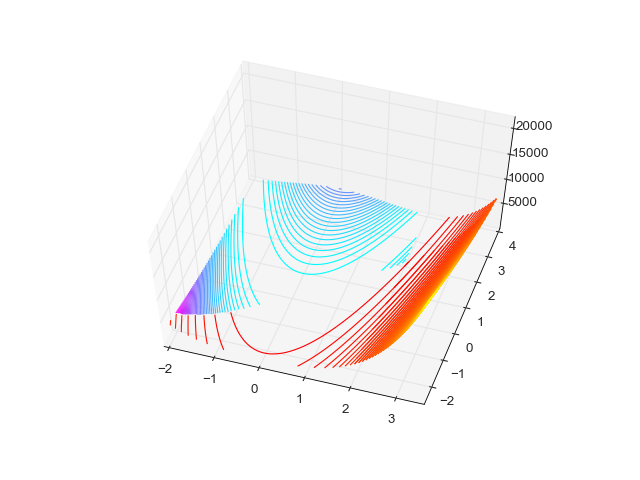

In [31]:
#%matplotlib notebook
plot_constraints_3D0(X1_for_graph_before_meshgrid, X2_for_graph_before_meshgrid, explicit_constraints, equality_implicit_constraints, inequality_implicit_constraints, 'autumn')

In [32]:
def plot_constraints_3D1(display_choice, X1_for_graph_before_meshgrid, X2_for_graph_before_meshgrid, inequality_implicit_constraints, cmap):
   
    total_number_of_constraints = len(explicit_constraints) + len(inequality_implicit_constraints) + len(equality_implicit_constraints)  
    alpha_value = 1. / total_number_of_constraints
    
    X1_for_graph, X2_for_graph = np.meshgrid(X1_for_graph_before_meshgrid, X2_for_graph_before_meshgrid)
    
    plt.clf()
    plt.close('all')
    #ax = plt.axes(projection='3d')
    ax = plt.gca(projection='3d')
    
    #ax.contour3D(X1_for_graph, X2_for_graph, Z_for_graph, 50, cmap='cool')
    #ax.scatter(X1_for_graph, X2_for_graph, Z_for_graph, c='r', marker='o', alpha = 0.5)
    
    #explicit constraints - we know that there will be exactly two, because it is a contour plot - draws 2D functions
    #Z_of_explicit_constraint_on_X1 = create_graph_data_for_explicit_constraint(X1_for_graph_before_meshgrid, X2_for_graph_before_meshgrid, explicit_constraints[0], True)
    #ax.contour3D(X1_for_graph, X2_for_graph, Z_of_explicit_constraint_on_X1, 50, cmap=cmap)
    
    #Z_of_explicit_constraint_on_X2 = create_graph_data_for_explicit_constraint(X1_for_graph_before_meshgrid, X2_for_graph_before_meshgrid, explicit_constraints[1], False)
    #ax.contour3D(X1_for_graph, X2_for_graph, Z_of_explicit_constraint_on_X1, 50, cmap=cmap)
    
    #inequality implicit constraints
    #for each constraint
    for constraint in inequality_implicit_constraints:  
        #find its data
        Z_of_constraint = create_graph_data_for_inequality_implicit_constraint(X1_for_graph_before_meshgrid, X2_for_graph_before_meshgrid, constraint)
        
        colors = cm.viridis(Z_of_constraint)
        rcount, ccount, _ = colors.shape
        
        #plot its data
        if(display_choice == 'contour_3D'):
            ax.contour3D(X1_for_graph, X2_for_graph, Z_of_constraint, 50, cmap=cmap)
        elif(display_choice == 'wireframe'):
            ax.plot_wireframe(X1_for_graph, X2_for_graph, Z_of_constraint, rstride=5, cstride=5)
        elif(display_choice == 'plot_surface_with_colour'):
            ax.plot_surface(X1_for_graph, X2_for_graph, Z_of_constraint, rstride=2, cstride=2, linewidth=0, antialiased=False)
        elif(display_choice == 'surface_wireframe?'):
            fig = plt.figure()
            ax = fig.gca(projection='3d')
            surf = ax.plot_surface(X1_for_graph, X2_for_graph, Z_of_constraint, facecolors=colors, shade=False)
            surf.set_facecolor((0,0,0,0))
        else:
            ax.plot_surface(X1_for_graph, X2_for_graph, Z_of_constraint, linewidth=0, antialiased=False)
        #ax.plot_trisurf(X1_for_graph, X2_for_graph, Z_of_constraint, linewidth=0.5, antialiased=True)
        #ax.scatter(X1_for_graph, X2_for_graph, Z_of_constraint, c='g', marker='^')
        #'''

        #fig = plt.figure()
        #ax = fig.gca(projection='3d')
        #surf = ax.plot_surface(X1_for_graph, X2_for_graph, Z_of_constraint, facecolors=colors, shade=False)
        #surf.set_facecolor((0,0,0,0))
        #'''
        
        '''
        for i in range(len(Z_for_graph)):
            for j in range(len(Z_for_graph[i])):
                if type(Z_of_constraint[i][j]) is not np.nan:
                    Z_for_graph[i][j] = np.nan
        '''
        for i in range(len(Z_for_graph)):
            for j in range(len(Z_for_graph[i])):
                if np.isnan(Z_of_constraint[i][j]):
                    pass
                else:
                    Z_for_graph[i][j] = np.nan
    #equality implicit constraints
    #for each constraint
    #for constraint in equality_implicit_constraints:  
        #find its data
        #Z_of_constraint = create_graph_data_for_equality_implicit_constraint(X1_for_graph_before_meshgrid, X2_for_graph_before_meshgrid, constraint)
        
        #plot its data
        #ax.contour3D(X1_for_graph, X2_for_graph, Z_of_constraint, 50, cmap='RdGy')
    
    colors = cm.viridis(Z_for_graph)
    rcount, ccount, _ = colors.shape
    if(display_choice == 'contour_3D'):
        ax.contour3D(X1_for_graph, X2_for_graph, Z_for_graph, 50, cmap='cool')
    elif(display_choice == 'wireframe'):
        ax.plot_wireframe(X1_for_graph, X2_for_graph, Z_for_graph, rstride=10, cstride=10)
    elif(display_choice == 'plot_surface_with_colour'):
        ax.plot_surface(X1_for_graph, X2_for_graph, Z_for_graph, rstride=1, cstride=1, linewidth=0, antialiased=False, cmap = 'cool')
    elif(display_choice == 'surface_wireframe?'):
        surf = ax.plot_surface(X1_for_graph, X2_for_graph, Z_for_graph, facecolors=colors, shade=False)
        surf.set_facecolor((0,0,0,0))
    else:
        ax.plot_surface(X1_for_graph, X2_for_graph, Z_for_graph, linewidth=0, antialiased=False)
    #ax.plot_trisurf(X1_for_graph, X2_for_graph, Z_of_constraint, linewidth=0.2, antialiased=True)
    #surf = ax.plot_surface(X1_for_graph, X2_for_graph, Z_for_graph, facecolors=colors, shade=False)
    #surf.set_facecolor((0,0,0,0))
    
    plt.show()

In [33]:
display_choices = {
    'wireframe': 'wireframe',
    'contour_3D': 'contour_3D',
    'plot_surface': 'plot_surface',
    'plot_surface_with_colour': 'plot_surface_with_colour',
    'surface_wireframe?': 'surface_wireframe?'
}

In [34]:
constraint_cmap_choices = {
            'cool': 'cool',
            'copper': 'copper',
            #'winter': 'winter',
            'autumn': 'autumn',
            #'viridis': 'viridis'
}

In [35]:
interact(plot_constraints_3D1, display_choice = display_choices, X1_for_graph_before_meshgrid = fixed(X1_for_graph_before_meshgrid), X2_for_graph_before_meshgrid = fixed(X2_for_graph_before_meshgrid), inequality_implicit_constraints = fixed(inequality_implicit_constraints), cmap = constraint_cmap_choices)

<function __main__.plot_constraints_3D1>